In [19]:
import os
import cv2
from PIL import Image 
import numpy as np 
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [6]:
#!pip install opencv-python
!pip install patchify

In [9]:
dataset_root_folder = 'E:/A Python/Practic Data/GIS satellite/02 kgl/Semantic segmentation dataset'

In [9]:
dataset_name = "DubaiDataset"

In [7]:
for path, subdirs, files in os.walk(dataset_root_folder):
    dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
    if dir_name == 'masks': # 'images
        images = os.listdir(path)
        print(path)
    #print(images)
    for i ,image_name in enumerate(images):
        if (image_name.endswith('.png')):
          #  print(image_name)
            a = True
    

NameError: name 'images' is not defined

In [10]:
image = cv2.imread(f'{dataset_root_folder}/Tile 1/images/image_part_001.jpg',1)

In [20]:
minmaxscaler = MinMaxScaler()

In [17]:
image_patch_size = 256

In [21]:

image_dataset = []
mask_dataset = []

#image_extension = 'jpg'
#image_type = 'images'
for image_type in ['images' , 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'
    for tile_id in range(1,8):
        for image_id in range(1,10):
            image = cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            #print(image.shape)
            size_x = (image.shape[1]//image_patch_size)*image_patch_size
            size_y = (image.shape[0]//image_patch_size)*image_patch_size
            #print("{} --- {} - {}".format(image.shape, size_x, size_y))
            image = Image.fromarray(image)
            image = image.crop((0,0 ,size_x , size_y))
            #print("({} , {})".format(image.size[0],image.size[1]))
            image = np.array(image)
            patched_image = patchify(image , (image_patch_size,image_patch_size, 3) ,step=image_patch_size)
            #print(len(image_patches))
            for i in range(patched_image.shape[0]):
                for j in range(patched_image.shape[1]):
                    if image_type == 'images':
                        individual_patched_image = patched_image[i,j,:,:]
                        #print(individual_patched_image.shape)
                        individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                        individual_patched_image = individual_patched_image[0]
                        #print(individual_patched_image.shape)
                        image_dataset.append(individual_patched_image)
                    elif image_type == 'masks':
                        individual_patched_mask = patched_image[i,j,:,:]
                        individual_patched_mask = individual_patched_mask[0]
                        #print('***',individual_patched_mask)
                        mask_dataset.append(individual_patched_mask)


In [94]:
#len(image_dataset)
len(mask_dataset)

945

In [57]:
image_patches=patchify(image , (image_patch_size,image_patch_size, 3) ,step=image_patch_size)

In [97]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

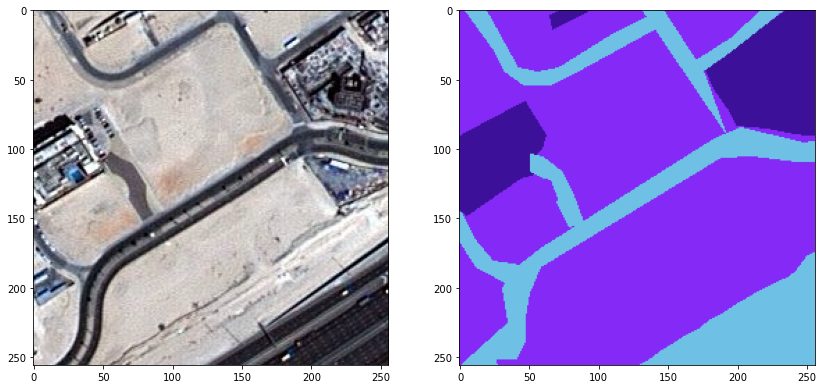

In [102]:

random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [106]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [128]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    #print(label_segment)
    label_segment = label_segment[:,:,0]
    #print(label_segment)
    return label_segment

In [129]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [124]:
labels = np.array(labels)

In [132]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [133]:
labels=np.expand_dims(labels,axis=3)

In [137]:
labels[0]#[:,:,0

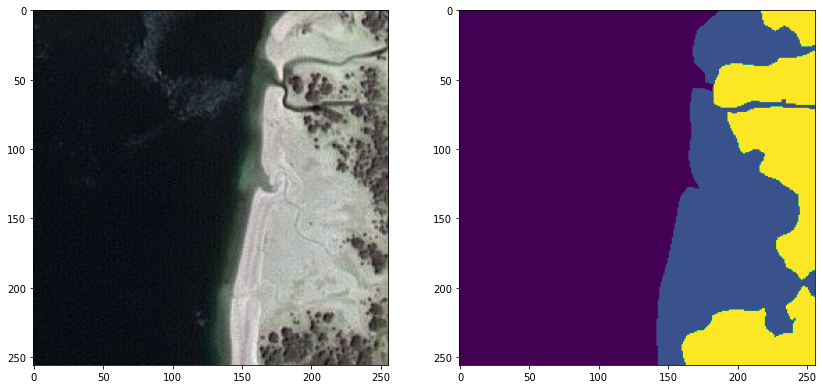

In [171]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

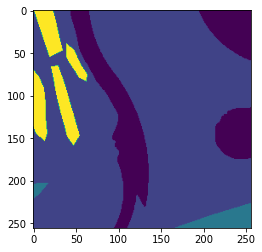

In [166]:
plt.imshow(labels[1][:,:,0])

In [142]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [143]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [148]:
from tensorflow.keras.utils import to_categorical 

ImportError: cannot import name 'KerasLazyLoader' from 'tensorflow.python.util.lazy_loader' (C:\Users\mayan\anaconda3\lib\site-packages\tensorflow\python\util\lazy_loader.py)

In [145]:
total_classes= 6

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [189]:
storage_space_bytes = image_dataset.nbytes

# Convert bytes to a human-readable format (e.g., megabytes)
storage_space_megabytes = storage_space_bytes / (1024 ** 2)  # 1 MB = 1024^2 bytes

print(f"Storage space of X_train: {storage_space_bytes} bytes or {storage_space_megabytes:.2f} MB")

Storage space of X_train: 1486356480 bytes or 1417.50 MB


In [188]:
image_dataset.shape

(945, 256, 256, 3)

In [160]:
import h5py
import numpy as np


# Save the array to an HDF5 file
with h5py.File('image_dataset.h5', 'w') as hf:
    hf.create_dataset('data', data=image_dataset)

# Load the array from the HDF5 file
#with h5py.File('data_array.h5', 'r') as hf:
   # loaded_array = hf['data'][:]


In [163]:
np.save('image_dataset.npy', image_dataset)

In [165]:
np.save('mask_dataset.npy', labels)

In [179]:
image_dataset[1][:,:,1]

array([[0.89411765, 0.90980392, 0.78431373, ..., 0.09411765, 0.08235294,
        0.05882353],
       [0.89019608, 0.83137255, 0.77647059, ..., 0.05490196, 0.06666667,
        0.08627451],
       [0.92156863, 0.91372549, 0.83137255, ..., 0.05882353, 0.07058824,
        0.09803922],
       ...,
       [0.61176471, 0.78039216, 0.89803922, ..., 0.58039216, 0.67058824,
        0.67058824],
       [0.6745098 , 0.82745098, 0.82745098, ..., 0.62352941, 0.69019608,
        0.68235294],
       [0.8       , 0.8627451 , 0.74901961, ..., 0.68235294, 0.6       ,
        0.64313725]])